# Project #1: Research Design Write-Up Part 2
***

## "A problem well-stated is half-solved" -- Charles Kettering

This first project will enable me to create a framework to scope out data science projects. This framework will provide me with a guide to develop a well-articulated problem statement and analysis plan that will be robust and reproducible.

*Goal: Create a structured iPython notebook using markup*

### DELIVERABLES

#### Completed iPython Notebook

__Requirements:__

- Identify features of the dataset, including the outcome and covariates/predictors
- Create a data dictionary with classification of available variables
- Write a high quality problem statement
- State the risks and assumptions of your data
- Outline exploratory analysis methods

__Bonus:__

- Practice writing an alternative problem statement for your dataset
- Articulate the risks and assumptions of this alternative model

### RESOURCES

#### Dataset

We'll be using the same dataset as UCLA's Logistic Regression in R tutorial to explore logistic regression in Python, as explained in yhat's blog. This is an excellent resource for using logistic regression and summary statistics to explore a relevant dataset. Our goal will be to identify the various factors that may influence admission into graduate school. It contains four variables- admit, gre, gpa, rank.

* Our goal will be to identify the various factors that may influence admission into graduate school. It contains four variables- admit, gre, gpa, rank.* 

- 'admit' is a binary variable. It indicates whether or not a candidate was admitted admit =1) our not (admit= 0)
- 'gre' is GRE score
- 'gpa' stands for Grade Point Average
- 'rank' is the rank of an applicant's undergraduate alma mater, with 1 being the highest and 4 as the lowest

Dataset: [Admissions.csv](https://github.com/thufirtan/DS-SG-04/blob/master/projects/unit-projects/project-1/assets/admissions.csv)

### Read and evaluate the following problem statement:

Determine which factors predict students' admissions into graduate school, using GRE scores, GPA and the prestige ranking of an applicant's undergraduate alma mater and outcome of the admission (admit = 1, or not admit = 0)

#### Let's get started with our dataset
1. Create a data dictionary
   >Answer:
   
   
| __Variable__      | __Description__        | __Type of Variable__  |
| ----------------- |------------------------| ------------------|
| Admission Status  | Admit =1 Not Admit = 2 | Categorical       |
| GRE Score         | GRE Score              | Continuous        |
| GPA               | Grade Point Average    | Continuous        |
| Prestige          | Alumni Ranking         | Ordinal           |

We would like to explore the association between GRE Score, GPA, Prestige and Admission Status into Graduate School.

2. What is the outcome?
   
   >Answer: The outcome is 'Admission into Graduate School'
   
3. What are the predictors/covariates?
   
   >Answer: The predictors/covariates are: GRE Score, GPA and Alumni Ranking 
   
4. What timeframe is this data relevent for?
   
   >Answer: Unknown as this is cross-sectional
   
5. What is the hypothesis?

   >Answer: NULL Hypothesis: There is no relationship between GRE Scores, GPA and Alumni Ranking with Admission into Graduate school. 
   
   >The hypothesis is that GRE Scores, GPA and Alumni Ranking is correlated with Admission into Graduate School, in particular, that a higher GRE Score, GPA and Alumni Ranking is associated with positive admission into graduate school as they are objective measures of the quality of the student. 
   

### Using the above information, write a well-formed problem statement. 

#### Problem Statement

>Graduate school admission may be dependent on several factors. We want to create a model which can predict the likelihood of being admitted into graduate school based on three variables: GRE Score, GPA and the ranking of the students' Alma Mater. 

>The hypothesis is that GRE Scores, GPA and Alumni Ranking is correlated with Admission into Graduate School, in particular, that a higher GRE Score, GPA and Alumni Ranking is associated with positive admission into graduate school as they are objective measures of the quality of the student. 

Exploratory Analysis Plan

Using the lab from a class as a guide, create an exploratory analysis plan.

1. What are the goals of the exploratory analysis?
   
   >Answer: Exploratory analysis allows for better understanding of the data, to describe the data structure and information that has been collected, as well as to explore variables and data types. 

2. a) What are the assumptions of the distribution of data?

   >Answer: A normal distribution is often assumed. The central limit theorem is also a fundamental tool, which states that with some assumptions, sampling distributions are normal with a specific mean and variance. 
   
2. b) How will you determine the distribution of your data?

   >Answer: Descriptive statistics will be reported, followed by measures of skewness and kurtosis, and histogram/box plots. 
   
3. a) How might outliers impact your analysis?

   >Answer: Outliers increase error variance and reduce the power of statistical tests. If non-randomly distributed, they can decrease normality and also bias or influence estimates. 
   
3. b) How will you test for outliers?

   >Answer: Visual inspection of the data, measures of the mean, median, standard deviation and variance will help to identify outlying data points. 
   
4. a) What is colinearity?
   
   >Answer: It is a phenomenon in which two predictor variables in a multiple regression model are highly correlated. In this situation, the coefficient estimates of the multiple regression may change erratically in response to small changes in the model or in the data. 
   
4. b) How will you test for colinearity?

   >Answer: Tests of correlation between predictor variables may reveal colinearity. 
   
5. What are the risks and assumptions of your data?

   >The risks include the lack of time-based information on the data. There is no indication on the duration of the data collection period. There are only 400 rows of data, which may not be a large enough sample to make accurate predictions on outcomes. It is also assumed that this data has been randomly sampled with no bias.   

What is your exploratory analysis plan?

Using the above information, write an exploratory analysis plan that would allow you or a colleague to reproduce your analysis 1 year from now.

   >Answer:
1. Import file Admissions.csv
2. Review dataset
3. Plot density and box plots for variables GPA and GRE scores
4. Perform descriptive statistics and review Mean, Mode, Median, and Standard Deviation
5. Plot scatter plot of GPA vs GRE and review correlation coefficient 
6. Review the skewness and kurtosis of GPA and GRE
7. Create dummy variables for levels of ranking (prestige) of students' alma mater
8. Report the correlation between Admit to GPA, GRE, Prestige levels
9. A heatmap will help to visualize the above correlations
10. Using statsmodel, perform regression to review the predictive value of GRE, GPA and prestige on admission 
11. Report the p values of the regression model. 
-> See code documentation below
***

*Bonus Questions:*

*Outline your analysis method for predicting your outcome*
>See code documentation below for details.

*Write an alternative problem statement for your dataset*
>Ranking of a students' Alma Mater may have predictive power on the students' GPA and GRE scores. 

*Articulate the assumptions and risks of the alternative model*
>The assumption is that the Alma Mater ranking levels do not change over time, and that the scoring methodology for GPA and GRE scores is robust. 

In [67]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import statsmodels.formula.api as smf

%matplotlib inline

In [4]:
admissions = pd.read_csv("/Users/Administrator/lessons/DS-SG-04/projects/unit-projects/project-1/assets/admissions.csv")

In [136]:
admissions.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


In [60]:
len(admissions)

400

In [10]:
print admissions.columns

Index([u'admit', u'gre', u'gpa', u'prestige'], dtype='object')


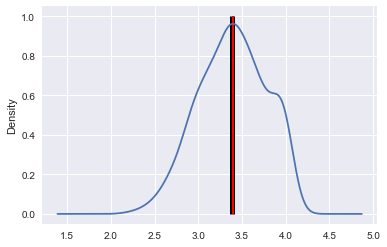

In [124]:
# density plot for continuous variable GPA
admissions["gpa"].plot(kind="density")
plt.vlines (admissions["gpa"].mean(),
           ymin=0,
           ymax=1.0,
           linewidth=5.0)
plt.vlines (admissions["gpa"].median(),
           ymin=0,
           ymax=1.0,
           linewidth=2.0,
           color="red")

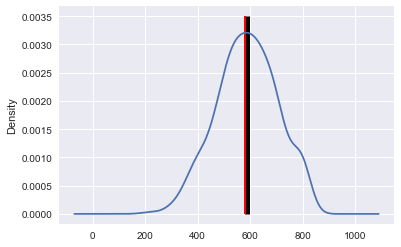

In [130]:
# density plots for continuous variable GRE
admissions["gre"].plot(kind="density")
plt.vlines (admissions["gre"].mean(),
           ymin=0,
           ymax=0.0035,
           linewidth=5.0)
plt.vlines (admissions["gre"].median(),
           ymin=0,
           ymax=0.0035,
           linewidth=2.0,
           color="red")

In [13]:
# descriptive stats
admissions.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


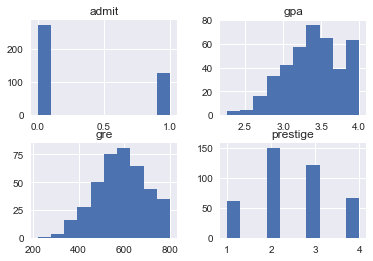

In [20]:
# plot all of the columns
admissions.hist()
plt.show()

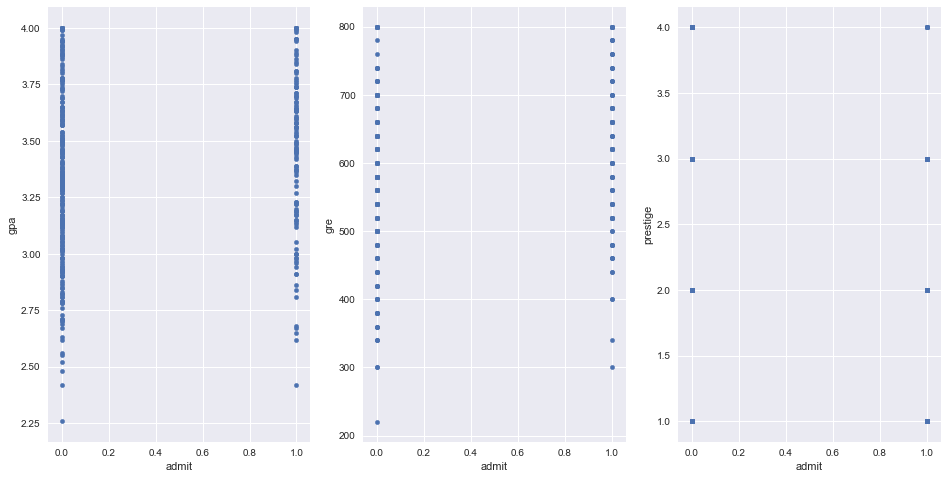

In [65]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1,3,sharey=False)
admissions.plot(kind='scatter',x='admit',y='gpa',ax=axs[0],figsize=(16,8))
admissions.plot(kind='scatter',x='admit',y='gre',ax=axs[1])
admissions.plot(kind='scatter',x='admit',y='prestige',ax=axs[2])

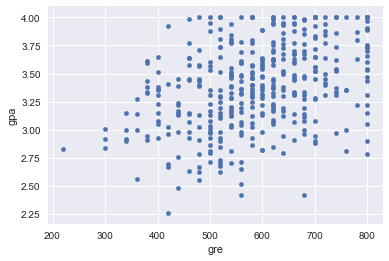

In [66]:
# Is there a relationship between GRE scores and GPA? - maybe
admissions.plot(kind='scatter',x='gre',y='gpa')

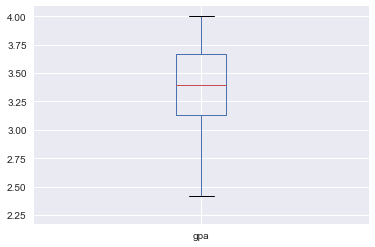

In [109]:
# box plot for GPA
admissions[["gpa"]].plot(kind="box")

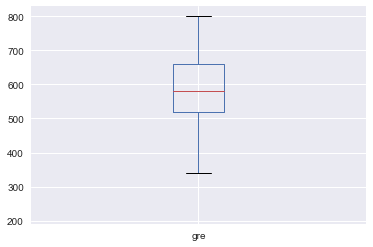

In [110]:
#box plot for GRE
admissions[["gre"]].plot(kind="box")

In [111]:
admissions[["gre","gpa"]].corr()

,gre,gpa
gre,1.000000,0.382408
gpa,0.382408,1.000000


In [112]:
# skewness of GRE
admissions.gre.skew()

-0.15012666594587223

In [113]:
# skewness of GPA
admissions.gpa.skew()

-0.21176549033509626

In [114]:
# kurtosis GRE
admissions.gre.kurtosis()

-0.33006533816662031

In [135]:
# kurtosis GPA
admissions.gpa.kurtosis()

-0.57462254321495232

In [22]:
# dummify rank to handle categorical variables
dummy_ranks = pd.get_dummies(admissions['prestige'], prefix='prestige')
print dummy_ranks.head()

   prestige_1.0  prestige_2.0  prestige_3.0  prestige_4.0
0             0             0             1             0
1             0             0             1             0
2             1             0             0             0
3             0             0             0             1
4             0             0             0             1


In [34]:
# create a clean data frame for the regression
cols_to_keep = ['admit', 'gre', 'gpa']
data = admissions[cols_to_keep].join(dummy_ranks.ix[:, 'prestige_2':])
print data.head()

   admit    gre   gpa  prestige_2.0  prestige_3.0  prestige_4.0
0      0  380.0  3.61             0             1             0
1      1  660.0  3.67             0             1             0
2      1  800.0  4.00             0             0             0
3      1  640.0  3.19             0             0             1
4      0  520.0  2.93             0             0             1


In [82]:
data = data.rename(columns={'prestige_2.0':'prestige2','prestige_3.0':'prestige3','prestige_4.0':'prestige4'})

In [88]:
data.shape

(400, 6)

In [83]:
# Looking at correlations between the variables
data.corr()

,admit,gre,gpa,prestige2,prestige3,prestige4
admit,1.000000,0.182919,0.175952,0.059627,-0.121800,-0.133356
gre,0.182919,1.000000,0.382408,0.057174,-0.075340,-0.069701
gpa,0.175952,0.382408,1.000000,-0.054744,0.072956,-0.085888
prestige2,0.059627,0.057174,-0.054744,1.000000,-0.510113,-0.347449
prestige3,-0.121800,-0.075340,0.072956,-0.510113,1.000000,-0.295397
prestige4,-0.133356,-0.069701,-0.085888,-0.347449,-0.295397,1.000000


In [84]:
corr_data = data.corr(method = 'pearson')

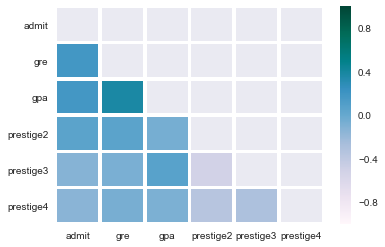

In [85]:
# Playing around with heatmaps to visualize correlations
mask = np.zeros_like(corr_data)
mask[np.triu_indices_from(mask)] = True
# Create the heatmap using seaborn library. 
# List if colormaps (parameter 'cmap') is available here: http://matplotlib.org/examples/color/colormaps_reference.html
sns.heatmap(corr_data, cmap='PuBuGn', vmax=1.0, vmin=-1.0 , mask = mask, linewidths=2.5)

In [86]:
# Using statsmodels to estimate the association between admission to graduate school and GRE Score, GPA and Alumni Rankings
lm = smf.ols(formula='admit ~ gre + gpa + prestige2 + prestige3 + prestige4', data=data).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  admit   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     8.594
Date:                Fri, 16 Jun 2017   Prob (F-statistic):           9.71e-08
Time:                        12:54:47   Log-Likelihood:                -239.02
No. Observations:                 397   AIC:                             490.0
Df Residuals:                     391   BIC:                             513.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2377      0.217     -1.095      0.274      -0.665       0.189
gre            0.0004      0.000      1.997      0.047    6.48e-06       0.001
gpa            0.1508      0.064      2.349      0.019       0.025       0.277
prestige2     -0.1635      0.068     -2.407      0.017      -0.297      -0.030
prestige3     -0.2910      0.070     -4.139      0.000      -0.429      -0.153
prestige4     -0.3240      0.079     -4.082      0.000      -0.480      -0.168
==============================================================================
Omnibus:                      152.312   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.314
Skew:                           0.678   Prob(JB):                     1.19e-11
Kurtosis:                       1.904   Cond. No.                     6.07e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.07e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

It appears that both GRE and GPA are significantly positively correlated with admission into graduate school, whilst coming from a highly ranking alma mater is significantly negatively correlated with admission. Thus we can reject the null hypothesis that admission is not correlated to GRE and GPA scores, but not alumni ranking. 

In [133]:
#alternative problem statement - that highly ranking alma maters produce higher GPA and GRE resulted students
lm = smf.ols(formula='prestige4 ~ gre + gpa', data=data).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              prestige4   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.822
Date:                Fri, 16 Jun 2017   Prob (F-statistic):              0.163
Time:                        17:25:51   Log-Likelihood:                -171.62
No. Observations:                 397   AIC:                             349.2
Df Residuals:                     394   BIC:                             361.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4881      0.172      2.834      0.005       0.150       0.827
gre           -0.0001      0.000     -0.767      0.444      -0.000       0.000
gpa           -0.0708      0.054     -1.322      0.187      -0.176       0.034
==============================================================================
Omnibus:                      116.102   Durbin-Watson:                   1.893
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              221.018
Skew:                           1.743   Prob(JB):                     1.02e-48
Kurtosis:                       4.102   Cond. No.                     5.68e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.68e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

It appears that neither GRE and GPA are correlated with alumni ranking. Thus we cannot reject the hypothesis that ranking of a students' Alma Mater may not have predictive power on the students' GPA and GRE scores. 



-END OF SUBMISSION-

PS: Here, i was trying to perform logistic regression using logit as it is a binary prediction outcome. however, i keep running into errors as shown below. :( 

In [90]:
# manually add the intercept
data['intercept'] = 1.0

In [101]:
# creating indices
train_cols = data.columns[1:,]
# using logistic regression - i cannot get this to work, so i'm just leaving it here for future reference
logit = smf.Logit(data['admit'], data[train_cols])
result = logit.fit()

ValueError: On entry to DLASCL parameter number 5 had an illegal value